In [50]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import datetime as dt
import time

In [51]:
con = pd.read_csv("Datasets/Concentrations.csv")
con.head()

,ID CIP2,CIP2,ID CIP4,CIP4,ID CIP6,CIP6,ID Year,Year,ID Nation,Nation,ID Degree,Degree,Completions,Slug CIP6,Geography,ID Geography,Slug Geography
0,1,Agriculture,100,General Agriculture,10000,General Agriculture,2019,2019,01000US,United States,5,Bachelors Degree,18,general-agriculture-010000,Georgia,04000US13,georgia
1,1,Agriculture,101,Agriculture Business & Management,10101,General Agriculture Management,2019,2019,01000US,United States,5,Bachelors Degree,19,general-agriculture-management,Georgia,04000US13,georgia
2,1,Agriculture,101,Agriculture Business & Management,10102,Agricultural Business Operations,2019,2019,01000US,United States,5,Bachelors Degree,55,agricultural-business-operations,Georgia,04000US13,georgia
3,1,Agriculture,101,Agriculture Business & Management,10103,Agricultural Economics,2019,2019,01000US,United States,5,Bachelors Degree,46,agricultural-economics,Georgia,04000US13,georgia
4,1,Agriculture,105,Agricultural & Domestic Animal Services,10507,Equestrian Studies,2019,2019,01000US,United States,5,Bachelors Degree,8,equestrian-studies,Georgia,04000US13,georgia


## Delete unecessary columns

In [52]:
#Drop unecessary columns
clean_con = con.drop(['Degree','Nation', 'Geography','ID CIP2','ID CIP4','ID Year','ID Nation','ID Degree','ID Geography','Slug Geography','Slug CIP6','ID CIP6'], axis = 1)
# Drop all rows with missing information
clean_con.dropna(how='any')
clean_con.head()

,CIP2,CIP4,CIP6,Year,Completions
0,Agriculture,General Agriculture,General Agriculture,2019,18
1,Agriculture,Agriculture Business & Management,General Agriculture Management,2019,19
2,Agriculture,Agriculture Business & Management,Agricultural Business Operations,2019,55
3,Agriculture,Agriculture Business & Management,Agricultural Economics,2019,46
4,Agriculture,Agricultural & Domestic Animal Services,Equestrian Studies,2019,8


In [53]:
# Describe de dataframe
clean_con['Completions'].describe()

count    3307.000000
mean      119.813426
std       340.543204
min         0.000000
25%         7.000000
50%        25.000000
75%        84.000000
max      3824.000000
Name: Completions, dtype: float64

### Cleaning Daily New Cases by Date.csv

In [54]:
daily = pd.read_csv('datasets/Daily New Cases by Date.csv')
daily.shape

(2225, 42)

In [55]:
# Drop all rows with missing information
daily.dropna(how='any')
#Drop unecessary columns
clean_daily=daily.drop(daily.columns[[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]], axis = 1)
clean_daily.dropna(how='any')

,Date,ConfirmedGrowth,DailyDeaths,DailyHospitalized,DailyTests,Confirmed,Tests,Hospitalized,Deaths,DeathsConfirmed,DeathsProbable,PositivePct,CurrentlyHospitalized,CurrentlyInICU,CurrentlyOnVentilator,Geography,Timestamp
25,3/26,17592,313.0,656.0,106945.0,92143.0,668725,2609.0,1371.0,292,37,13.778908,7805.0,1299.0,258.0,United States,1585195200000
26,3/27,19215,411.0,776.0,101260.0,111358.0,769985,3385.0,1782.0,392,47,14.462360,10887.0,1792.0,293.0,United States,1585281600000
27,3/28,19785,550.0,682.0,111430.0,131143.0,881415,4067.0,2332.0,502,70,14.878689,12393.0,2174.0,390.0,United States,1585368000000
28,3/29,19683,506.0,559.0,86974.0,150826.0,968389,4626.0,2838.0,614,82,15.574939,14055.0,2456.0,433.0,United States,1585454400000
29,3/30,21139,584.0,624.0,100592.0,171965.0,1068981,5250.0,3422.0,780,98,16.086815,15892.0,3087.0,449.0,United States,1585540800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,3/5,3701,30.0,1117.0,94291.0,806370.0,10993311,65254.0,23521.0,21124,2397,7.335097,1881.0,389.0,223.0,New Jersey,1614920400000
2216,3/6,1722,52.0,0.0,100359.0,589931.0,16728973,19713.0,16374.0,16044,330,3.526403,687.0,176.0,114.0,Massachusetts,1615006800000
2217,3/6,3720,36.0,0.0,3720.0,810090.0,10997031,65254.0,23557.0,21160,2397,7.366443,1862.0,382.0,233.0,New Jersey,1615006800000
2221,3/7,1425,43.0,0.0,96578.0,591356.0,16825551,19713.0,16417.0,16085,332,3.514631,665.0,174.0,116.0,Massachusetts,1615093200000


### Median Household Income.csv

In [56]:
household = pd.read_csv("datasets/Household Income.csv")
#Drop unecessary columns
house = household.drop(['ID Year','Geography','ID Geography','Slug Geography'], axis = 1)
# Drop all rows with missing information
house.dropna(how='any')
house.head()
# check of the desciption of the dataframe
print(house.describe())
house.head()

       ID Household Income Bucket        Year  Household Income  \
count                  192.000000   192.00000      1.920000e+02   
mean                     7.500000  2015.50000      3.824098e+06   
std                      4.621824     1.71229      4.079575e+06   
min                      0.000000  2013.00000      1.391770e+05   
25%                      3.750000  2014.00000      1.948480e+05   
50%                      7.500000  2015.50000      2.584732e+06   
75%                     11.250000  2017.00000      6.108038e+06   
max                     15.000000  2018.00000      1.525487e+07   

       Household Income Moe       share  
count            192.000000  192.000000  
mean           24838.114583    0.062500  
std            18048.416773    0.022478  
min             4982.000000    0.038691  
25%             7749.250000    0.046815  
50%            20454.500000    0.052435  
75%            39641.500000    0.076207  
max            72691.000000    0.125534  


,ID Household Income Bucket,Household Income Bucket,Year,Household Income,Household Income Moe,share
0,0,"< $10,000",2018,7598669,46912.0,0.062530
1,1,"$10,000-$14,999",2018,5267344,40230.0,0.043345
2,2,"$15,000-$19,999",2018,5241202,35766.0,0.043130
3,3,"$20,000-$24,999",2018,5695642,42544.0,0.046870
4,4,"$25,000-$29,999",2018,5222981,35428.0,0.042980


### cleaning Unemployment Insurance Claims.csv

In [57]:
unemployment = pd.read_csv('datasets/Unemployment Insurance Claims.csv')
unemployment.head()

,week_ended,reflecting_week_end,fips_code,state_name,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Timestamp,Date,ID Geography,Geography
0,2021-04-17,2021-04-10,04000US13,Georgia,30313,140679,0,0.0,1618632000000,"April 17th, 2021",04000US13,Georgia
1,2021-04-17,2021-04-10,04000US26,Michigan,21861,100622,0,0.0,1618632000000,"April 17th, 2021",04000US26,Michigan
2,2021-04-17,2021-04-10,04000US36,New York,41179,403494,0,0.0,1618632000000,"April 17th, 2021",04000US36,New York
3,2021-04-17,2021-04-10,04000US42,Pennsylvania,21561,211803,0,0.0,1618632000000,"April 17th, 2021",04000US42,Pennsylvania
4,2021-04-17,2021-04-10,04000US48,Texas,43195,288370,0,0.0,1618632000000,"April 17th, 2021",04000US48,Texas


In [58]:
#Drop unecessary columns
unemp = unemployment.drop(['ID Geography','Geography'], axis = 1)
# Drop all rows with missing information
unemp.dropna(how='any')
# Display a statistical overview
print(unemp.describe())
unemp.head()

       initial_claims  continued_claims  covered_employment  \
count      860.000000      8.600000e+02        8.600000e+02   
mean     31522.238372      2.597599e+05        7.038299e+06   
std      53004.567760      3.525807e+05        3.151513e+06   
min       3573.000000      2.152200e+04        0.000000e+00   
25%      10265.000000      8.167375e+04        4.304929e+06   
50%      13969.500000      1.239170e+05        5.754323e+06   
75%      27721.750000      2.904945e+05        9.380736e+06   
max     394701.000000      2.204180e+06        1.242837e+07   

       insured_unemployment_rate     Timestamp  
count                 860.000000  8.600000e+02  
mean                    3.710488  1.566923e+12  
std                     4.786078  3.004670e+10  
min                     0.000000  1.515215e+12  
25%                     0.990000  1.541066e+12  
50%                     1.650000  1.566922e+12  
75%                     4.120000  1.592777e+12  
max                    23.430000  1.6186

,week_ended,reflecting_week_end,fips_code,state_name,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Timestamp,Date
0,2021-04-17,2021-04-10,04000US13,Georgia,30313,140679,0,0.0,1618632000000,"April 17th, 2021"
1,2021-04-17,2021-04-10,04000US26,Michigan,21861,100622,0,0.0,1618632000000,"April 17th, 2021"
2,2021-04-17,2021-04-10,04000US36,New York,41179,403494,0,0.0,1618632000000,"April 17th, 2021"
3,2021-04-17,2021-04-10,04000US42,Pennsylvania,21561,211803,0,0.0,1618632000000,"April 17th, 2021"
4,2021-04-17,2021-04-10,04000US48,Texas,43195,288370,0,0.0,1618632000000,"April 17th, 2021"


## Create a summary table of monthly test, monthly cases, and monthly deaths

In [59]:
updated_date=[]
for x,y in clean_daily.iterrows():
    updated_date.append(time.strftime("%Y-%m", time.localtime(int(y['Timestamp']/1000))))
clean_daily['Updated Date']=updated_date
cleand=clean_daily.drop(['Timestamp'], axis = 1)
cleand

,Date,ConfirmedGrowth,DailyDeaths,DailyHospitalized,DailyTests,Confirmed,Tests,Hospitalized,Deaths,DeathsConfirmed,DeathsProbable,PositivePct,CurrentlyHospitalized,CurrentlyInICU,CurrentlyOnVentilator,Geography,Updated Date
0,3/1,8,3.0,0.0,95.0,42.0,6651,NaN,8.0,",0",",0",0.631484,NaN,NaN,NaN,United States,2020-03
1,3/2,30,3.0,0.0,203.0,72.0,6854,NaN,11.0,NaN,",0",1.050481,NaN,NaN,NaN,United States,2020-03
2,3/3,42,3.0,0.0,266.0,114.0,7133,NaN,14.0,NaN,",0",1.598206,NaN,NaN,NaN,United States,2020-03
3,3/4,62,2.0,0.0,329.0,242.0,8023,4.0,16.0,",0",",0",3.016328,NaN,NaN,NaN,United States,2020-03
4,3/5,63,4.0,1.0,1477.0,307.0,9538,5.0,20.0,",0",",0",3.218704,NaN,NaN,NaN,United States,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,3/7,1709,1.0,35.0,18827.0,1023487.0,7359069,56797.0,17906.0,15598,2308,13.907833,2008.0,NaN,NaN,Georgia,2021-03
2221,3/7,1425,43.0,0.0,96578.0,591356.0,16825551,19713.0,16417.0,16085,332,3.514631,665.0,174.0,116.0,Massachusetts,2021-03
2222,3/7,2519,17.0,0.0,2519.0,812609.0,10999550,65254.0,23574.0,21177,2397,7.387657,1792.0,376.0,232.0,New Jersey,2021-03
2223,3/7,1658,32.0,0.0,52432.0,948643.0,10681716,1145.0,24349.0,NaN,NaN,8.880998,1587.0,314.0,183.0,Pennsylvania,2021-03


In [60]:
group_date = cleand.groupby('Updated Date')
group_date_sum = group_date.sum()
group_date_sum

,ConfirmedGrowth,DailyDeaths,DailyHospitalized,DailyTests,Confirmed,Tests,Hospitalized,Deaths,PositivePct,CurrentlyHospitalized,CurrentlyInICU,CurrentlyOnVentilator
Updated Date,,,,,,,,,,,,
2020-03,234203,5057.0,8631.0,1427549.0,1394882.0,10427427,40984.0,24044.0,2851.788126,108418.0,14295.0,2496.0
2020-04,1120260,70961.0,50260.0,6638033.0,24507136.0,135297455,1044513.0,1175593.0,3857.675024,1891241.0,449296.0,190058.0
2020-05,880697,54287.0,97018.0,13773967.0,56799233.0,449515621,3209364.0,3336995.0,3016.842286,1728355.0,418999.0,199232.0
2020-06,999533,24906.0,42322.0,19820733.0,79979100.0,940566223,5394219.0,4338221.0,1853.564049,1153279.0,264330.0,102268.0
2020-07,2312572,32129.0,72477.0,30337114.0,135747446.0,1760901727,7175918.0,5243557.0,1657.081361,2063963.0,391208.0,80363.0
2020-08,1779516,39255.0,68234.0,29611949.0,202262495.0,2703275604,9639911.0,6458731.0,1555.092016,1719751.0,350002.0,79415.0
2020-09,1436282,28932.0,42110.0,32417881.0,240966862.0,3528896616,10821727.0,7267983.0,1346.767141,1139793.0,232681.0,54925.0
2020-10,2200994,28249.0,83863.0,43241631.0,301846651.0,4817556629,12906454.0,8351214.0,1267.382167,1426810.0,284190.0,64541.0
2020-11,5302978,44865.0,99366.0,56738740.0,406424110.0,6158961253,15369682.0,9157900.0,1277.897079,2616995.0,524259.0,144881.0


In [61]:
# Makign a bar plot showing the changes in Confirmedgrowth, Dailydeaths, Dailytests...
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [62]:
# Using Matplotlib to generate a bar chart
a_xis = group_date_sum.index.tolist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

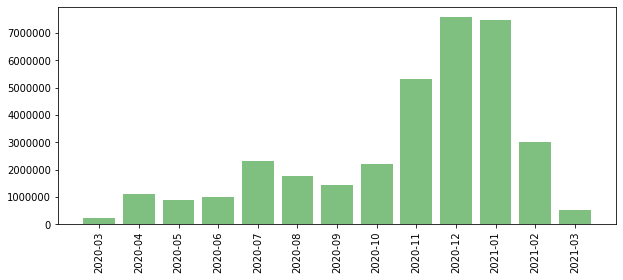

In [63]:
# Create a bar chart using Matplotlib: monthly changes of confirmed growth
growth = group_date_sum['ConfirmedGrowth'].tolist()
plt.figure(figsize=(10,4))
plt.bar(a_xis, growth, color='g', alpha=0.5, align="center")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

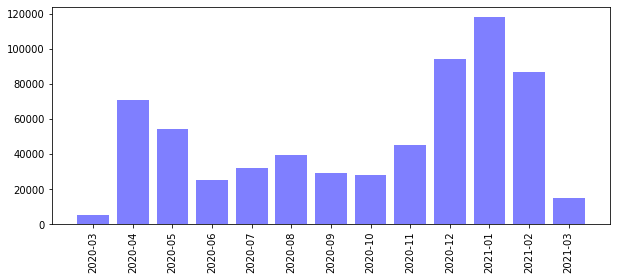

In [64]:
# Create a bar chart using Matplotlib: monthly changes of Daily Deaths
growth = group_date_sum['DailyDeaths'].tolist()
plt.figure(figsize=(10,4))
plt.bar(a_xis, growth, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

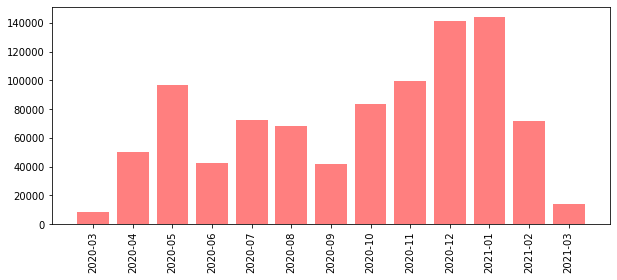

In [65]:
# Create a bar chart using Matplotlib: monthly changes of Daily Hospitalized
growth = group_date_sum['DailyHospitalized'].tolist()
plt.figure(figsize=(10,4))
plt.bar(a_xis, growth, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

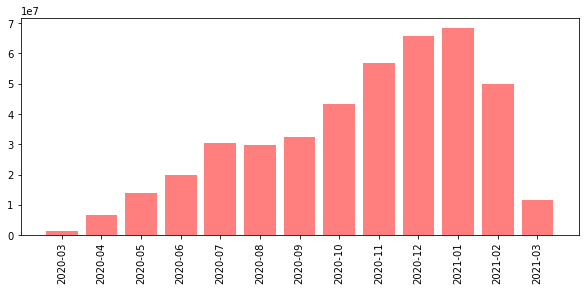

In [66]:
# Create a bar chart using Matplotlib: monthly changes of Daily Deaths
growth = group_date_sum['DailyTests'].tolist()
plt.figure(figsize=(10,4))
plt.bar(a_xis, growth, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

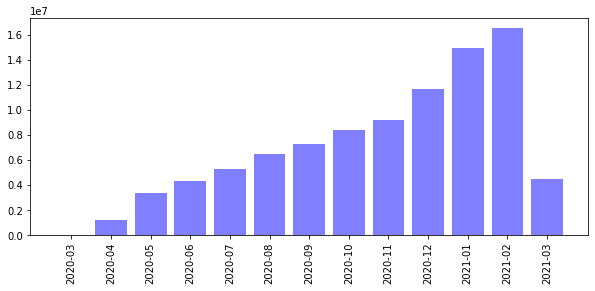

In [67]:
# Create a bar chart using Matplotlib: monthly changes of Daily Deaths
growth = group_date_sum['Deaths'].tolist()
plt.figure(figsize=(10,4))
plt.bar(a_xis, growth, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)

In [68]:
groupd = cleand.groupby('Geography')
groupd.sum()

,ConfirmedGrowth,DailyDeaths,DailyHospitalized,DailyTests,Confirmed,Tests,Hospitalized,Deaths,PositivePct,CurrentlyHospitalized,CurrentlyInICU,CurrentlyOnVentilator
Geography,,,,,,,,,,,,
Georgia,1023485,17906.0,56797.0,7359069.0,1.234991e+08,1004320699,8971046.0,2349202.0,4925.113923,797424.0,0.0,0.0
Massachusetts,599468,16417.0,19713.0,16825532.0,7.130973e+07,1841465390,4270787.0,3195716.0,2554.854505,443931.0,93854.0,31144.0
New Jersey,812924,23574.0,65254.0,10999550.0,1.050846e+08,1411224671,9994009.0,5352150.0,6147.701879,811696.0,176011.0,123093.0
Pennsylvania,948643,24349.0,1145.0,10681716.0,1.010724e+08,1291584188,390808.0,3384652.0,3464.506971,714330.0,99374.0,102466.0
Texas,2686818,44451.0,0.0,19907378.0,3.112425e+08,2578573150,0.0,5256010.0,3495.405937,2130880.0,642089.0,0.0
United States,28769540,515249.0,792560.0,363873302.0,3.400891e+09,45085026922,117539264.0,73389590.0,3256.938354,20643414.0,4184552.0,1383404.0


In [69]:
cleand_corr = cleand.corr()
cleand_corr.unstack().sort_values()

Hospitalized           PositivePct             -0.155008
PositivePct            Hospitalized            -0.155008
DailyTests             PositivePct             -0.135036
PositivePct            DailyTests              -0.135036
Deaths                 PositivePct             -0.133527
                                                  ...   
DailyTests             DailyTests               1.000000
DailyHospitalized      DailyHospitalized        1.000000
DailyDeaths            DailyDeaths              1.000000
CurrentlyInICU         CurrentlyInICU           1.000000
CurrentlyOnVentilator  CurrentlyOnVentilator    1.000000
Length: 144, dtype: float64

In [70]:
# create a summary table of graduates and homeowners
#2019 is latest year in dataset and they all have bachelors degree
cond = clean_con.groupby('CIP2')
round(cond.agg({'Completions' : ['sum', 'mean']}),2)

Completions        
                                                           sum    mean
CIP2                                                                  
Agriculture                                               3129   26.97
Architecture and Related Services                         1580   49.38
Biology                                                  25824  195.64
Business                                                 81869  326.17
Communication Technologies                                2821   97.28
Communications                                           19777  175.02
Computer and Information Sciences and Support S...       16771  133.10
Cultural & Gender Studies                                 1282   11.05
Education                                                25227  100.91
Engineering                                              21575  123.99
Engineering Technologies                                  2403   25.03
English                                                   9041  226.02
Health                                                   37540  130.80
History                                                   6187  281.23
Human Sciences                                            5054   45.12
Interdisciplinary Studies                                 6097   49.57
Language & Linguistics                                    5330   35.30
Legal                                                      637   19.91
Liberal Arts & Humanities                                 5520  172.50
Math & Statistics                                         4326   92.04
Natural Resources & Conservation                          1834   39.02
Parks, Recreation, & Leisure                              9348  166.93
Personal & Culinary Services                               155   15.50
Philosophy and Religious Studies                          2484   38.81
Physical Sciences                                         6264   70.38
Protective Services                                      11572  192.87
Psychology                                               25088  317.57
Public Administration and Social Service                  5057  105.35
Science Technologies                                        10    5.00
Social Sciences                                          26616  209.57
Theology                                                  1778   22.22
Transportation                                             223   31.86
Visual & Performing Arts                                 23804   66.68

In [71]:
#create a summary table of unemployment claims by state (georgia) and month 
gunemp= unemp.loc[unemp['state_name'] == 'Georgia']
gunemps=gunemp.copy()
updated_date=[]
for x,y in gunemps.iterrows():
    updated_date.append(time.strftime("%Y-%m", time.localtime(int(y['Timestamp']/1000))))
gunemps['Updated Date']=updated_date
gunempd=gunemps.drop(['Timestamp'], axis = 1)
gunempd.head()

,week_ended,reflecting_week_end,fips_code,state_name,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Date,Updated Date
0,2021-04-17,2021-04-10,04000US13,Georgia,30313,140679,0,0.00,"April 17th, 2021",2021-04
5,2021-04-10,2021-04-03,04000US13,Georgia,38382,139056,0,0.00,"April 10th, 2021",2021-04
10,2021-04-03,2021-03-27,04000US13,Georgia,33623,137678,4316067,3.19,"April 3rd, 2021",2021-04
15,2021-03-27,2021-03-20,04000US13,Georgia,39282,132821,4316067,3.08,"March 27th, 2021",2021-03
20,2021-03-20,2021-03-13,04000US13,Georgia,24789,135962,4316067,3.15,"March 20th, 2021",2021-03


In [72]:
gdate = gunempd.groupby('Updated Date')
unemply = round(gdate.agg(['sum', 'mean']),2)
unemply

initial_claims            continued_claims             \
                        sum       mean              sum       mean   
Updated Date                                                         
2018-01               43544   10886.00           149602   37400.50   
2018-02               22940    5735.00           120513   30128.25   
2018-03               24840    4968.00           134347   26869.40   
2018-04               20396    5099.00           104743   26185.75   
2018-05               19917    4979.25           101112   25278.00   
2018-06               25805    5161.00           131650   26330.00   
2018-07               27304    6826.00           115851   28962.75   
2018-08               19271    4817.75           103971   25992.75   
2018-09               22623    4524.60           120449   24089.80   
2018-10               23649    5912.25            97128   24282.00   
2018-11               23495    5873.75            94428   23607.00   
2018-12               34160    6832.00           129196   25839.20   
2019-01               43876   10969.00           134407   33601.75   
2019-02               21889    5472.25           108755   27188.75   
2019-03               23687    4737.40           124528   24905.60   
2019-04               19002    4750.50            95607   23901.75   
2019-05               18400    4600.00            95714   23928.50   
2019-06               22920    4584.00           123821   24764.20   
2019-07               24681    6170.25           109015   27253.75   
2019-08               21957    4391.40           126097   25219.40   
2019-09               17649    4412.25            97998   24499.50   
2019-10               20629    5157.25            97288   24322.00   
2019-11               24299    4859.80           118845   23769.00   
2019-12               25203    6300.75           106989   26747.25   
2020-01               48440   12110.00           147263   36815.75   
2020-02               27621    5524.20           136554   27310.80   
2020-03              155974   38993.50           185815   46453.75   
2020-04             1223281  305820.25          2326240  581560.00   
2020-05              963517  192703.40          3975450  795090.00   
2020-06              510461  127615.25          2711623  677905.75   
2020-07              450909  112727.25          2752729  688182.25   
2020-08              302416   60483.20          2851041  570208.20   
2020-09              185352   46338.00          2037574  509393.50   
2020-10              224880   44976.00          1861367  372273.40   
2020-11               91724   22931.00           996743  249185.75   
2020-12              102338   25584.50           694509  173627.25   
2021-01              159640   31928.00           829756  165951.20   
2021-02              112752   28188.00           578993  144748.25   
2021-03              113745   28436.25           550531  137632.75   
2021-04              102318   34106.00           417413  139137.67   

             covered_employment             insured_unemployment_rate         
                            sum        mean                       sum   mean  
Updated Date                                                                  
2018-01                16824185  4206046.25                      3.56   0.89  
2018-02                16844296  4211074.00                      2.86   0.72  
2018-03                21055370  4211074.00                      3.19   0.64  
2018-04                16894552  4223638.00                      2.48   0.62  
2018-05                16911304  4227826.00                      2.39   0.60  
2018-06                21139130  4227826.00                      3.12   0.62  
2018-07                16974325  4243581.25                      2.74   0.68  
2018-08                16995332  4248833.00                      2.45   0.61  
2018-09                21244165  4248833.00                      2.84   0.57  
2018-10                17062664  4265666.00           

In [73]:
unemp = unemply.loc['2020-03':'2021-04']
unemp

initial_claims            continued_claims             \
                        sum       mean              sum       mean   
Updated Date                                                         
2020-03              155974   38993.50           185815   46453.75   
2020-04             1223281  305820.25          2326240  581560.00   
2020-05              963517  192703.40          3975450  795090.00   
2020-06              510461  127615.25          2711623  677905.75   
2020-07              450909  112727.25          2752729  688182.25   
2020-08              302416   60483.20          2851041  570208.20   
2020-09              185352   46338.00          2037574  509393.50   
2020-10              224880   44976.00          1861367  372273.40   
2020-11               91724   22931.00           996743  249185.75   
2020-12              102338   25584.50           694509  173627.25   
2021-01              159640   31928.00           829756  165951.20   
2021-02              112752   28188.00           578993  144748.25   
2021-03              113745   28436.25           550531  137632.75   
2021-04              102318   34106.00           417413  139137.67   

             covered_employment             insured_unemployment_rate         
                            sum        mean                       sum   mean  
Updated Date                                                                  
2020-03                17492236  4373059.00                      4.25   1.06  
2020-04                17538271  4384567.75                     53.03  13.26  
2020-05                21942020  4388404.00                     90.58  18.12  
2020-06                17553616  4388404.00                     61.79  15.45  
2020-07                17607073  4401768.25                     62.53  15.63  
2020-08                22031115  4406223.00                     64.71  12.94  
2020-09                17624892  4406223.00                     46.23  11.56  
2020-10                22085939  4417187.80                     42.14   8.43  
2020-11                17679716  4419929.00                     22.55   5.64  
2020-12                17679716  4419929.00                     15.72   3.93  
2021-01                21684197  4336839.40                     19.12   3.82  
2021-02                17264268  4316067.00                     13.42   3.36  
2021-03                17264268  4316067.00                     12.75   3.19  
2021-04                 4316067  1438689.00                      3.19   1.06

Text(0.5, 0, 'xlabel')

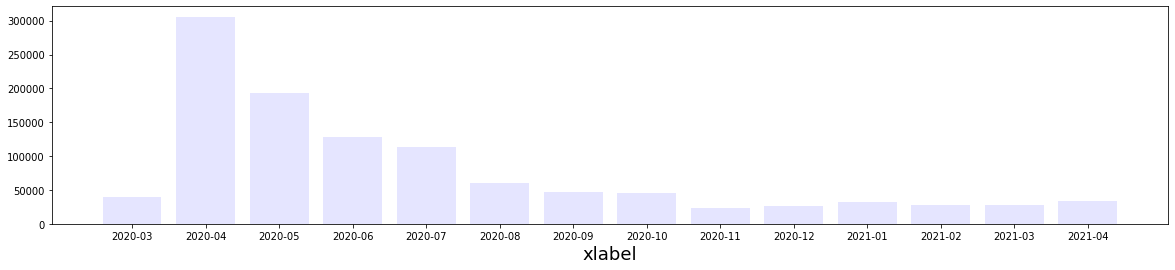

In [74]:
plt.figure(figsize=(20,4))
plt.bar(unemp.index.values, unemp['initial_claims']['mean'], color='b', alpha=0.1, align="center")
plt.xlabel('xlabel', fontsize=18)